# Sentiment Analysis of Martin Luther King Jr's speech delivered at Lincoln Memorial, Washington D.C. on August 28, 1963.

<p>Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a></p>
- GITAM Institute of Science.

## 1. Web Scraping.

### Importing necessary libraries.

In [52]:
from bs4 import BeautifulSoup as BS
import requests

In [53]:
url = 'http://www.analytictech.com/mb021/mlk.htm'
page = requests.get(url)

In [54]:
soup = BS(page.text, 'html.parser')

In [61]:
speech = soup.find_all('p')

### Creating a list of paragraphs of the speech.

In [62]:
speech_list = [ii.text for ii in speech]

In [63]:
for ii in speech_list:
    print(ii)
    print('--------\n')

I am happy to join with you today in what will go down in
history as the greatest demonstration for freedom in the history
of our nation. 
--------

Five score years ago a great American in whose symbolic shadow
we stand today signed the Emancipation Proclamation. This
momentous decree came as a great beckoning light of hope to
millions of Negro slaves who had been seared in the flames of
withering injustice. It came as a joyous daybreak to end the long
night of their captivity. 
--------

But one hundred years later the Negro is still not free. One
hundred years later the life of the Negro is still sadly crippled
by the manacles of segregation and the chains of discrimination. 
--------

One hundred years later the Negro lives on a lonely island of
poverty in the midst of a vast ocean of material prosperity. 
--------

One hundred years later the Negro is still languishing in the
comers of American society and finds himself in exile in his own
land. 
--------

We all have come to this

<hr><hr>

## 2. Data cleaning.

In [69]:
import re
for ii in range(len(speech_list)):
    speech_list[ii] = re.sub('[^a-zA-Z]', ' ' , speech_list[ii], flags = re.IGNORECASE)
    # We can use '\W' (non - alphanumeric character or non - word character) instead of '[^a-zA-Z]'.

    #Convert into LowerCase.
    speech_list[ii] = speech_list[ii].lower()

<hr><hr>

## 3. WordCloud analysis.

#### Joining all the words in the list into a string variable.

In [82]:
comment_words = ''
for ii in speech_list:
    comment_words += ii
comment_words = comment_words.replace('  ', ' ')

#### Importing necessary libraries.

In [71]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [73]:
from PIL import Image as II
import numpy as np

#### Creating a mask for wordcloud.
- p.s Doesn't work!

In [103]:
# mask = np.array(II.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

#### Creating a set of stopwords.

In [94]:
stopwords_list = set(STOPWORDS)

#### Creating wordcloud.

In [110]:
wc = WordCloud( width = 500, height = 300, max_words = 50,
               stopwords = stopwords_list, background_color = None, mode = 'RGBA',
               contour_width = 0.5, contour_color = 'green').generate(comment_words)

#### Plotting the WordCloud image.

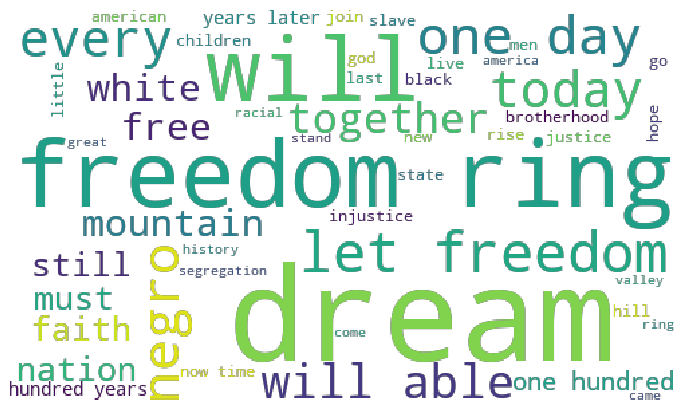

In [107]:
import matplotlib.pyplot as plt         
plt.figure(figsize = (12, 9), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show() 

### Creating an external .png file. (EXPORT)

In [111]:
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')
wc.to_file('mlk.png')

<hr><hr>

## 4. Sentiment scores.

#### Removing stopwords.

In [130]:
for ii in range(len(speech_list)):
    y = [ii for ii in speech_list[ii].split() if ii not in stopwords_list]
    y = ' '.join(y)
    speech_list[ii] = y

In [132]:
speech_list[0]

'happy join today will go history greatest demonstration freedom history nation'

#### Creating a DataFrame.

In [135]:
mlk = pd.DataFrame({'paragraph': speech_list})

#### Importing textblob library.

In [133]:
from textblob import TextBlob as TB

#### Creating Lamda functions to calculate polarity and subjectivity.

In [149]:
pol = lambda x: round(TB(x).sentiment.polarity, 2)
sub = lambda x: round(TB(x).sentiment.subjectivity, 2)

In [150]:
mlk['polarity'] = mlk['paragraph'].apply(pol)
mlk['subjectivity'] = mlk['paragraph'].apply(sub)

In [151]:
mlk.head(10)

,paragraph,polarity,subjectivity
0,happy join today will go history greatest demo...,0.90,1.00
1,five score years ago great american whose symb...,0.39,0.52
2,one hundred years later negro still free one h...,-0.02,0.45
3,one hundred years later negro lives lonely isl...,-0.03,0.57
4,one hundred years later negro still languishin...,0.00,0.00
5,come hallowed spot remind america fierce urgen...,-0.07,0.25
6,will neither rest tranquility america negro gr...,0.00,0.00
7,must forever conduct struggle high plane digni...,0.17,0.46
8,marvelous new militarism engulfed negro commun...,0.33,0.39
9,even though face difficulties today tomorrow s...,0.00,0.20


<hr><hr>

## 5. Visualization using graph.

#### Creating a function to convert rgb values to hexadecimal color codes.

In [166]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
rgb_to_hex((100,3,180))

'6403b4'

#### Creating a subplots of polarity and subjectivity with respect to paragraphs.

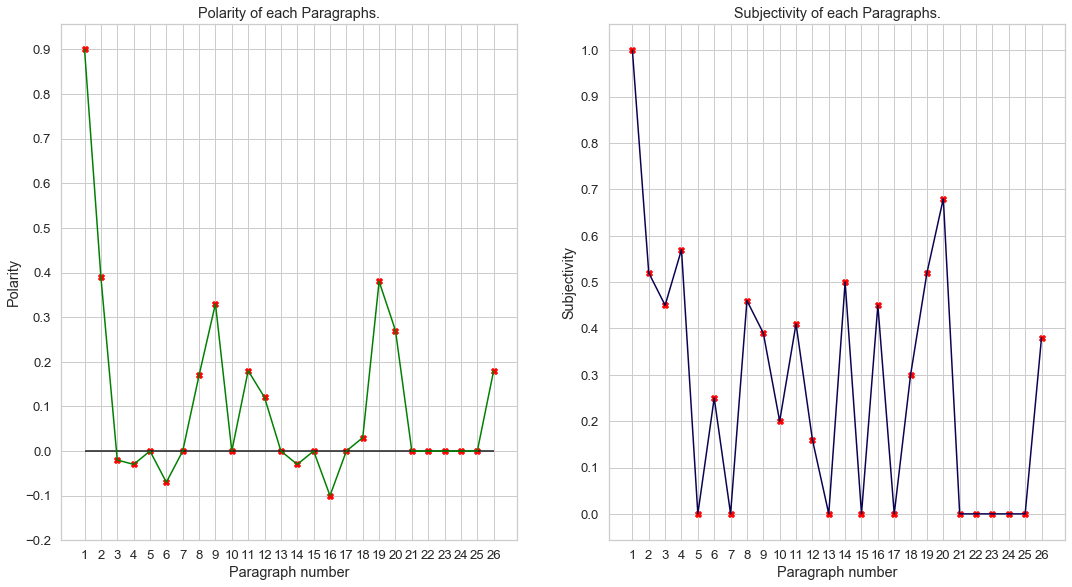

In [219]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize = (18,9.5))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.subplot(1,2,1)
plt.plot(np.arange(1,mlk.shape[0]+1), mlk.polarity, color = 'green')
plt.scatter(np.arange(1,mlk.shape[0]+1), mlk.polarity, color = 'red', marker = 'X')
plt.hlines(0,1,mlk.shape[0])
plt.title('Polarity of each Paragraphs.')
plt.xlabel('Paragraph number')
plt.ylabel('Polarity')
plt.xticks(np.arange(1,mlk.shape[0]+1))
plt.yticks(np.arange(-0.2, 1.0, 0.1))

plt.subplot(1,2,2)
plt.plot(np.arange(1,mlk.shape[0]+1), mlk.subjectivity, color = '#'+str(rgb_to_hex((10,3,80))))
plt.scatter(np.arange(1,mlk.shape[0]+1), mlk.subjectivity, color = 'red', marker = 'X')
plt.title('Subjectivity of each Paragraphs.')
plt.xlabel('Paragraph number')
plt.ylabel('Subjectivity')
plt.xticks(np.arange(1,mlk.shape[0]+1))
plt.yticks(np.arange(0.0, 1.1, 0.1))

# Saving the figure to a file.
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')
plt.savefig('paragraph.pdf', dpi = 300, papertype = 'a4', format = 'pdf')

plt.show()

##### MartinLuther King Jr. is pretty much consistently positive in this speech. However in paragraph 16, we see a small speck of negativity. 

### Trend Lines.

#### i. Regression plots of order 2.

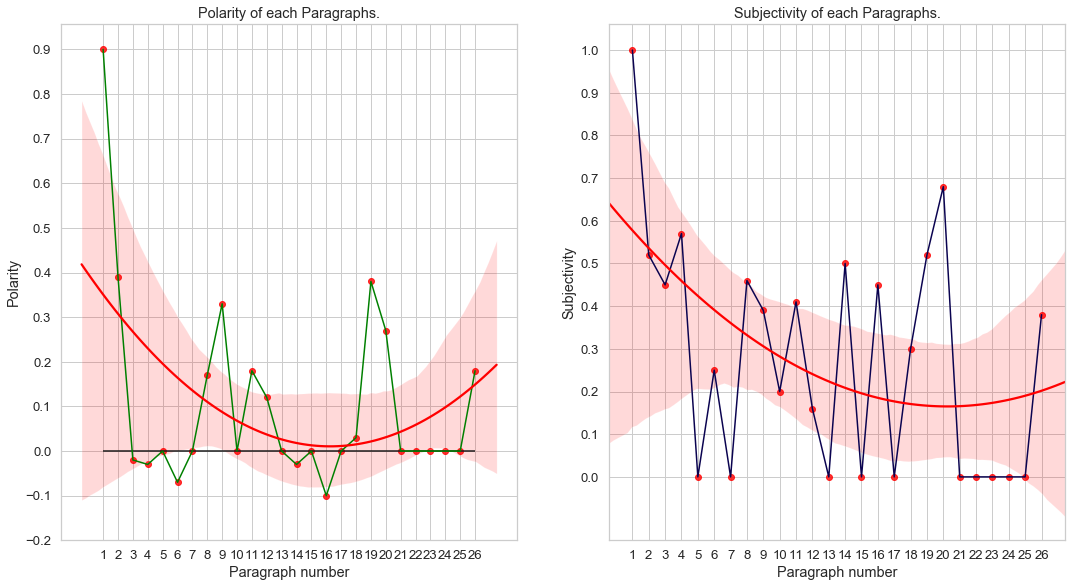

In [220]:
import seaborn as sns

plt.figure(figsize = (18,9.5))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.subplot(1,2,1)
plt.plot(np.arange(1,mlk.shape[0]+1), mlk.polarity, color = 'green')
sns.regplot(x = np.arange(1,mlk.shape[0]+1), y = mlk.polarity, order = 2, color = 'red')
plt.hlines(0,1,mlk.shape[0])
plt.title('Polarity of each Paragraphs.')
plt.xlabel('Paragraph number')
plt.ylabel('Polarity')
plt.xticks(np.arange(1,mlk.shape[0]+1))
plt.yticks(np.arange(-0.2, 1.0, 0.1))

plt.subplot(1,2,2)
plt.plot(np.arange(1,mlk.shape[0]+1), mlk.subjectivity, color = '#'+str(rgb_to_hex((10,3,80))))
sns.regplot(x = np.arange(1,mlk.shape[0]+1), y = mlk.subjectivity, order = 2, color = 'red')
plt.title('Subjectivity of each Paragraphs.')
plt.xlabel('Paragraph number')
plt.ylabel('Subjectivity')
plt.xticks(np.arange(1,mlk.shape[0]+1))
plt.yticks(np.arange(0.0, 1.1, 0.1))

# Saving the figure to a file.
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')
plt.savefig('regplot_paragraph_ord2.pdf', dpi = 300, papertype = 'a4', format = 'pdf')
plt.show()

#### ii. Regression plots of order 3.

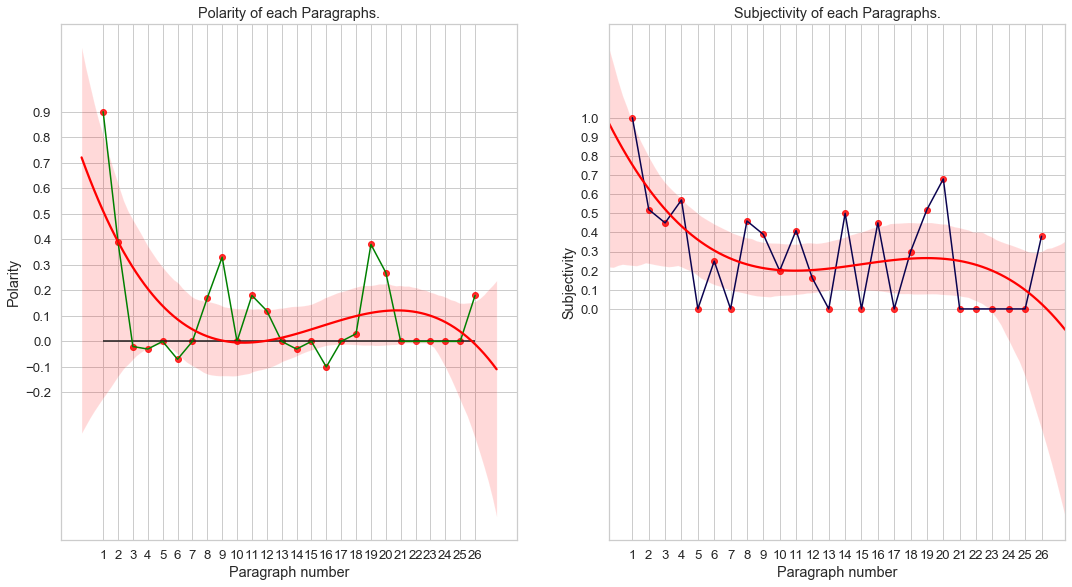

In [221]:
import seaborn as sns

plt.figure(figsize = (18,9.5))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.subplot(1,2,1)
plt.plot(np.arange(1,mlk.shape[0]+1), mlk.polarity, color = 'green')
sns.regplot(x = np.arange(1,mlk.shape[0]+1), y = mlk.polarity, order = 3, color = 'red')
plt.hlines(0,1,mlk.shape[0])
plt.title('Polarity of each Paragraphs.')
plt.xlabel('Paragraph number')
plt.ylabel('Polarity')
plt.xticks(np.arange(1,mlk.shape[0]+1))
plt.yticks(np.arange(-0.2, 1.0, 0.1))

plt.subplot(1,2,2)
plt.plot(np.arange(1,mlk.shape[0]+1), mlk.subjectivity, color = '#'+str(rgb_to_hex((10,3,80))))
sns.regplot(x = np.arange(1,mlk.shape[0]+1), y = mlk.subjectivity, order = 3, color = 'red')
plt.title('Subjectivity of each Paragraphs.')
plt.xlabel('Paragraph number')
plt.ylabel('Subjectivity')
plt.xticks(np.arange(1,mlk.shape[0]+1))
plt.yticks(np.arange(0.0, 1.1, 0.1))

# Saving the figure to a file.
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')
plt.savefig('regplot_paragraph_ord3.pdf', dpi = 300, papertype = 'a4', format = 'pdf')
plt.show()

In [185]:
script = [ii.text for ii in speech]
script[15]

'I have a dream that one day down in Alabama, with its vicious\r\nracists, with its Governor having his lips dripping with the\r\nwords of interposition and nullification, one day right there in\r\nAlabama little black boys and black girls will be able to join\r\nhands with little white boys and white girls as sisters and\r\nbrothers. '

<hr><hr>

## 6. Sentiment Score: word - by - word.

In [187]:
comment_words

'i am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation five score years ago a great american in whose symbolic shadow we stand today signed the emancipation proclamation this momentous decree came as a great beckoning light of hope to millions of negro slaves who had been seared in the flames of withering injustice it came as a joyous daybreak to end the long night of their captivity but one hundred years later the negro is still not free one hundred years later the life of the negro is still sadly crippled by the manacles of segregation and the chains of discrimination one hundred years later the negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity one hundred years later the negro is still languishing in the comers of american society and finds himself in exile in his own land we all have come to this hallowed spot to remind america of the fierce urgency of now 

#### Creating tokens.

In [194]:
comment_words = comment_words.split()

['i',
 'am',
 'happy',
 'to',
 'join',
 'with',
 'you',
 'today',
 'in',
 'what',
 'will',
 'go',
 'down',
 'in',
 'history',
 'as',
 'the',
 'greatest',
 'demonstration',
 'for',
 'freedom',
 'in',
 'the',
 'history',
 'of',
 'our',
 'nation',
 'five',
 'score',
 'years',
 'ago',
 'a',
 'great',
 'american',
 'in',
 'whose',
 'symbolic',
 'shadow',
 'we',
 'stand',
 'today',
 'signed',
 'the',
 'emancipation',
 'proclamation',
 'this',
 'momentous',
 'decree',
 'came',
 'as',
 'a',
 'great',
 'beckoning',
 'light',
 'of',
 'hope',
 'to',
 'millions',
 'of',
 'negro',
 'slaves',
 'who',
 'had',
 'been',
 'seared',
 'in',
 'the',
 'flames',
 'of',
 'withering',
 'injustice',
 'it',
 'came',
 'as',
 'a',
 'joyous',
 'daybreak',
 'to',
 'end',
 'the',
 'long',
 'night',
 'of',
 'their',
 'captivity',
 'but',
 'one',
 'hundred',
 'years',
 'later',
 'the',
 'negro',
 'is',
 'still',
 'not',
 'free',
 'one',
 'hundred',
 'years',
 'later',
 'the',
 'life',
 'of',
 'the',
 'negro',
 'is',
 '

#### Creating a dataframe of tokens.

In [196]:
mlk_mod = pd.DataFrame({'words': comment_words})

In [198]:
mlk_mod['polarity'] = mlk_mod['words'].apply(pol)
mlk_mod['subjectivity'] = mlk_mod['words'].apply(sub)

In [200]:
mlk_mod.head(10)

,words,polarity,subjectivity
0,i,0.0,0.0
1,am,0.0,0.0
2,happy,0.8,1.0
3,to,0.0,0.0
4,join,0.0,0.0
5,with,0.0,0.0
6,you,0.0,0.0
7,today,0.0,0.0
8,in,0.0,0.0
9,what,0.0,0.0


#### Visualization of polarity of each word using graph.

In [201]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
rgb_to_hex((100,3,180))

'6403b4'

#### i. Regression plot of order 2.

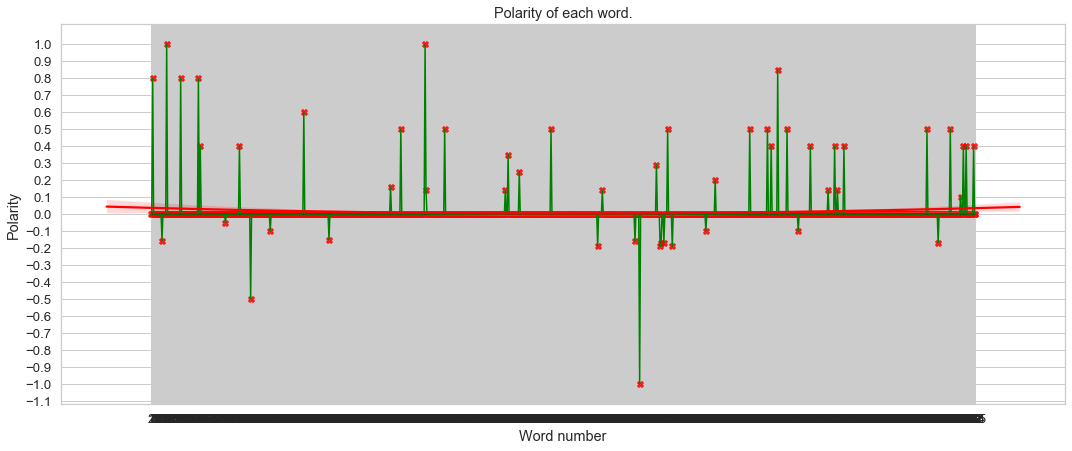

In [222]:
plt.figure(figsize = (18,7))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.plot(np.arange(1,mlk_mod.shape[0]+1), mlk_mod.polarity, color = 'green')
sns.regplot(x = np.arange(1,mlk_mod.shape[0]+1), y = mlk_mod.polarity,
            color = 'red', marker = 'X', order = 2)
plt.hlines(0,1,mlk_mod.shape[0])
plt.title('Polarity of each word.')
plt.xlabel('Word number')
plt.ylabel('Polarity')
plt.xticks(np.arange(1,mlk_mod.shape[0]+1))
plt.yticks(np.arange(-1.1, 1.1, 0.1))

# Saving the figure to a file.
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')
plt.savefig('regplot_wordbyword_ord2.pdf', dpi = 300, papertype = 'a4', format = 'pdf')
plt.show()

#### ii. Regression plot of order 3.

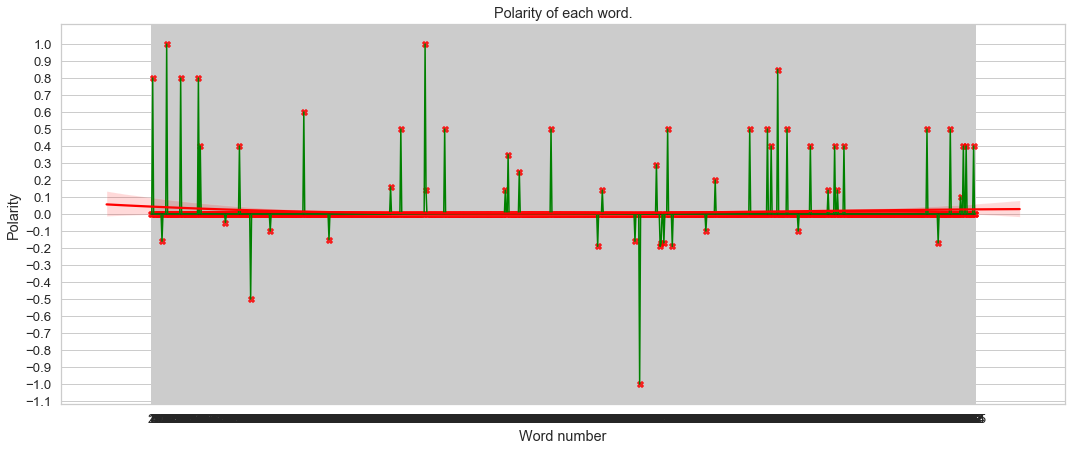

In [223]:
plt.figure(figsize = (18,7))
sns.set(style = 'whitegrid', font_scale = 1.2)

plt.plot(np.arange(1,mlk_mod.shape[0]+1), mlk_mod.polarity, color = 'green')
sns.regplot(x = np.arange(1,mlk_mod.shape[0]+1), y = mlk_mod.polarity,
            color = 'red', marker = 'X', order = 3)
plt.hlines(0,1,mlk_mod.shape[0])
plt.title('Polarity of each word.')
plt.xlabel('Word number')
plt.ylabel('Polarity')
plt.xticks(np.arange(1,mlk_mod.shape[0]+1))
plt.yticks(np.arange(-1.1, 1.1, 0.1))

# Saving the figure to a file.
os.chdir(r'C:\Users\acer\Desktop\PythonProgramming')
plt.savefig('regplot_wordbyword_ord3.pdf', dpi = 300, papertype = 'a4', format = 'pdf')
plt.show()

# The End.